In [2]:
import pandas as pd
import glob

# Path to the folder containing the CSV files (you can adjust this)
path = '../datasets/version_crawls'

# Get a list of all CSV files in the folder
all_files = glob.glob(path + "/*.csv")
print(all_files)

df_list = [pd.read_csv(file) for file in all_files]

t = 0
for df in df_list:
    print(len(df))
    t += len(df)

print(t)

# Read all CSV files and concatenate them into a single DataFrame
df_versions = pd.concat(df_list, ignore_index=True)

# Display the combined DataFrame
df_versions

['../datasets/version_crawls/Go.csv', '../datasets/version_crawls/Composer.csv', '../datasets/version_crawls/NuGet.csv', '../datasets/version_crawls/PyPI.csv', '../datasets/version_crawls/Maven.csv', '../datasets/version_crawls/RubyGems.csv', '../datasets/version_crawls/NPM.csv', '../datasets/version_crawls/Crates.csv']
5326
6486
1533
6055
6574
1431
10168
1825
39398


ID  \
0      SNYK-GOLANG-GITHUBCOMCOREDNSCOREDNSCOREDNSSERV...   
1      SNYK-GOLANG-GITHUBCOMCHAOSBLADEIOCHAOSBLADECLI...   
2      SNYK-GOLANG-GITHUBCOMCOREDNSCOREDNSPLUGINPKGPR...   
3      SNYK-GOLANG-GITHUBCOMAUTHZEDSPICEDBPKGTUPLE-80...   
4      SNYK-GOLANG-GITHUBCOMAUTHZEDSPICEDBINTERNALGRA...   
...                                                  ...   
39393                                GHSA-2grh-hm3w-w7hv   
39394                                GHSA-2367-c296-3mp2   
39395                                GHSA-qc36-q22q-cjw3   
39396                                GHSA-f3pg-qwvg-p99c   
39397                                GHSA-5h46-h7hh-c6x9   

                                           Package      CWE             CVE  \
0        github.com/coredns/coredns/core/dnsserver  CWE-290  CVE-2023-30464   
1      github.com/chaosblade-io/chaosblade/cli/cmd   CWE-95  CVE-2023-47105   
2      github.com/coredns/coredns/plugin/pkg/proxy  CWE-400  CVE-2023-28452   
3             github.com/authzed/spicedb/pkg/tuple  CWE-269  CVE-2024-46989   
4        github.com/authzed/spicedb/internal/graph  CWE-269  CVE-2024-46989   
...                                            ...      ...             ...   
39393                                        tokio  CWE-362  CVE-2021-38191   
39394                                          tar   CWE-59  CVE-2018-20990   
39395                                       lettre  CWE-147  CVE-2021-38189   
39396                                        hyper  CWE-444  CVE-2021-32715   
39397                                        hyper  CWE-190  CVE-2021-32714   

              Date Platform  \
0      19 Sep 2024       Go   
1      19 Sep 2024       Go   
2      19 Sep 2024       Go   
3      19 Sep 2024       Go   
4      19 Sep 2024       Go   
...            ...      ...   
39393  25 Aug 2021   Crates   
39394  25 Aug 2021   Crates   
39395  12 Jul 2021   Crates   
39396  12 Jul 2021   Crates   
39397  12 Jul 2021   Crates   

                                           Version Range  \
0                                                  ['*']   
1                                     ['>=0.3.0 <1.7.4']   
2                                            ['<1.11.0']   
3                                            ['<1.35.3']   
4                                            ['<1.35.3']   
...                                                  ...   
39393  [1.8.0,1.8.1)[1.7.0,1.7.2)[1.6.0,1.6.3)[0.3.0,...   
39394                                         [0,0.4.16)   
39395                                      [0.7.0,0.9.6)   
39396                                        [0,0.14.10)   
39397                                        [0,0.14.10)   

                                        GitHub URL Source  \
0               https://github.com/coredns/coredns   Snyk   
1      https://github.com/chaosblade-io/chaosblade   Snyk   
2               https://github.com/coredns/coredns   Snyk   
3               https://github.com/authzed/spicedb   Snyk   
4               https://github.com/authzed/spicedb   Snyk   
...                                            ...    ...   
39393  'url': 'https://github.com/tokio-rs/tokio'}    Git   
39394       https://github.com/alexcrichton/tar-rs    Git   
39395   'url': 'https://github.com/lettre/lettre'}    Git   
39396  'url': 'https://github.com/hyperium/hyper'}    Git   
39397  'url': 'https://github.com/hyperium/hyper'}    Git   

                                                Versions Disclosed_Date  
0      [{'number': 'v0.9.10', 'published_at': '2017-1...            NaN  
1      [{'number': 'v0.0.1', 'published_at': '2019-03...            NaN  
2      [{'number': 'v0.9.10', 'published_at': '2017-1...            NaN  
3      [{'number': 'v0.0.1', 'published_at': '2021-08...            NaN  
4      [{'number': 'v0.0.1', 'published_at': '2021-08...            NaN  
...                                                  ...            ...  
39393  [{'number': '0.0.0', 'published_

In [3]:
# List of values to remove
values_to_remove = [404, '502', '404', '[]']

# Remove rows where the 'Versions' column contains any of the values in the 'values_to_remove' list
df_available_versions_cleaned = df_versions[~df_versions['Versions'].isin(values_to_remove)]

# Reset the index after cleaning
df_available_versions_cleaned.reset_index(drop=True, inplace=True)

# print([i for i in list(set(df_available_versions_cleaned['Versions'].tolist())) if len(str(i))<10])
df_versions = df_available_versions_cleaned

# Meta Data Analysis

In [4]:
import ast
from datetime import datetime

# Function to convert the version string to a list of dictionaries
def get_metadata_from_versions(version_str):
    version_list = ast.literal_eval(version_str)
    version_list = sorted(version_list, key=lambda x: x['published_at'])


    first_version_date = version_list[0]['published_at']
    first_version_date = datetime.strptime(first_version_date, "%Y-%m-%dT%H:%M:%S.%fZ")
    last_version_date = version_list[-1]['published_at']
    last_version_date = datetime.strptime(last_version_date, "%Y-%m-%dT%H:%M:%S.%fZ")
    

    total_days = (last_version_date - first_version_date).days
    
    return total_days, len(version_list)

df_versions['versions_metadata'] = df_versions['Versions'].apply(get_metadata_from_versions)

# total_versions = get_metadata_from_versions(matching_row['Versions'])

# total_versions = sorted(total_versions, key=lambda x: x['published_at'])
df_versions

TypeError: 'int' object is not iterable

In [ ]:
version_list = df_versions['versions_metadata'].tolist()
platforms =  df_versions['Platform'].tolist()

avg_dict = {}

for i, (days, n_versions) in enumerate(version_list):
    plt = platforms[i]
    if days <= 0:
        continue

    if plt in avg_dict:
        avg_dict[plt] = (avg_dict[plt] + (n_versions/days)) / 2 
    else:
        avg_dict[plt] = (n_versions/days)
    

avg_dict
    

{'Crates': 0.034831816604017726,
 'NPM': 0.06714828542038229,
 'Composer': 0.017911692874266128,
 'PyPI': 0.02297966833265503,
 'Go': 0.14882747110779818,
 'RubyGems': 0.06667709116358043,
 'NuGet': 0.020417273178443378,
 'Maven': 0.017162532200237793}

# Package Versions Analysis

In [5]:
file = '../datasets/snyk_and_advisory.csv'
df_combined = pd.read_csv(file)
df_combined = df_combined.drop_duplicates(subset=['ID'])

df_combined


ID  \
0                   SNYK-DOTNET-MAGICKNETCORE-7856102   
1      SNYK-DOTNET-SERILOGENRICHERSCLIENTINFO-7853254   
2                       SNYK-DOTNET-RESTSHARP-7853196   
3                    SNYK-DOTNET-BOUNCYCASTLE-7831269   
4                    SNYK-DOTNET-BOUNCYCASTLE-7831267   
...                                               ...   
30567                             GHSA-9pgx-gcph-mpqr   
30568                             GHSA-p7v4-gm6j-cw9m   
30569                             GHSA-f4g9-h89h-jgv9   
30570                             GHSA-5p3x-r448-pc62   
30571                             GHSA-39wj-j3jc-858m   

                            Package      CWE             CVE         Date  \
0                   magick.net.core  CWE-122   CVE-2023-4863   1 Sep 2024   
1      serilog.enrichers.clientinfo  CWE-348  CVE-2024-44930  30 Aug 2024   
2                         restsharp  CWE-113  CVE-2024-45302  30 Aug 2024   
3                      bouncycastle  CWE-835  CVE-2024-30172  26 Aug 2024   
4                      bouncycastle  CWE-203  CVE-2024-30171  26 Aug 2024   
...                             ...      ...             ...          ...   
30567                 vrana/adminer   CWE-79  CVE-2020-35572  11 Feb 2021   
30568                   mautic/core   CWE-79   CVE-2021-3142  29 Jan 2021   
30569                       pysaml2  CWE-347  CVE-2021-21238  21 Jan 2021   
30570                       pysaml2  CWE-347  CVE-2021-21239  21 Jan 2021   
30571                   mautic/core   CWE-79  CVE-2020-35124  19 Jan 2021   

      Disclosed_Date  Platform                    Version Range  \
0        11 Sep 2023     NuGet                    ['[,13.3.0)']   
1        29 Aug 2024     NuGet                     ['[,2.1.0)']   
2        29 Aug 2024     NuGet  ['[107.0.0-preview.1,112.0.0)']   
3        12 Apr 2024     NuGet                         ['[0,]']   
4        11 Apr 2024     NuGet                         ['[0,]']   
...              ...       ...                              ...   
30567            NaN  Composer                        [0,4.7.9)   
30568            NaN  Composer      [3.0.0,3.2.4)[2.0.0,2.16.5)   
30569            NaN      PyPI                        [0,6.5.0)   
30570            NaN      PyPI                        [0,6.5.0)   
30571            NaN  Composer      [3.0.0,3.2.4)[2.0.0,2.16.5)   

                                              GitHub URL Source  
0                 https://github.com/dlemstra/Magick.NET   Snyk  
1      https://github.com/serilog-contrib/serilog-enr...   Snyk  
2                 https://github.com/restsharp/RestSharp   Snyk  
3                                                    NaN   Snyk  
4                                                    NaN   Snyk  
...                                                  ...    ...  
30567                   https://github.com/vrana/adminer    Git  
30568                   https://github.com/mautic/mautic    Git  
30569          https://github.com/IdentityPython/pysaml2    Git  
30570          https://github.com/IdentityPython/pysaml2    Git  
30571                   https://github.com/mautic/mautic    Git  

[30572 rows x 10 columns]

# Parse Versions from Mulitple Sources

In [6]:
import pandas as pd
import re
import ast

def normalize_version_ranges(version_ranges):
    normalized = []
    version_ranges = str(version_ranges)

    if 'nan' in str(version_ranges):
        return None
    elif '*' in str(version_ranges):
        return '*'
    elif '[0,]' in str(version_ranges):
        return '*'
    elif '[0.0,]' in str(version_ranges):
        return '*'
    elif '[,]' in str(version_ranges):
        return '*'

        

    try:
        version_ranges = ast.literal_eval(version_ranges)
    except (ValueError, SyntaxError):
        # print('first conversion error', version_ranges, type(version_ranges))
        return version_ranges

    first_int = True
    for item in version_ranges:
        # print()
        # print(item, type(item))

        if isinstance(item, int) or isinstance(item, float):
            if first_int:
                start = item
                first_int = False
            else:
                end = item
                first_int = True
                normalized.append(f"[{start},{end})")
            continue

        
        try:
            ranges = ast.literal_eval(item) if isinstance(item, str) else item
            # print('xxxxxxxxxxxxxxxxxxxxxxxxx', ranges == item)
        except (ValueError, SyntaxError):
            # print('Conversion Error',type(item), item)
            ranges = [item]
            # continue
        # print('-----', type(ranges), ranges)
        
        for version_range in ranges:
            # print('-----', type(version_range), version_range)
            

            if type(version_range) == type(1) or type(version_range) == type(1.0):
                if item.startswith('['):
                    start, end = version_range, "10000"  # Open-ended upper range
                elif item.startswith('[,'):
                    start, end = "0", version_range

            # elif len(version_range) == 2:
            #     if all(isinstance(x, int) for x in version_range) or all(isinstance(x, float) for x in version_range):
            #         start, end = version_range[0], version_range[1]
                
            elif '[' in version_range or '(' in version_range:
                match = re.findall(r'[0-9.\-_a-zA-Z*]+', version_range)
                # print(match)
                if len(match) == 1:  # Case like [,x)
                    if version_range.startswith('[,'):
                        start, end = "0", match[0]
                    elif version_range.startswith('['):
                        start, end = match[0], "10000"  # Open-ended upper range
                elif len(match) == 2:  # Case like [x,y)
                    start, end = match
            elif '<' in version_range or '>=' in version_range:
                if '<' in version_range and '>=' in version_range:  # Case like >=y <z
                    parts = re.findall(r'[0-9.\-_a-zA-Z*]+', version_range)
                    if len(parts) == 2:
                        start, end = parts[0], parts[1]
                    else:
                        continue
                elif '<' in version_range:  # Case like <x
                    start, end = "0", re.findall(r'[0-9.\-_a-zA-Z*]+', version_range)[0]
                elif '>=' in version_range:  # Case like >=y
                    start, end = re.findall(r'[0-9.\-_a-zA-Z*]+', version_range)[0], "10000"
                    continue
            else:
                continue
            normalized.append(f"[{start},{end})")
    return ''.join(normalized)

# # Example DataFrame
# data = {
#     "Version Range": [
#         "[2.5.0,2.5.17)[2.6.0,2.6.10)[2.7.0,2.7.1)",
#         "['[107.0.0-preview.1,112.0.0)']",
#         "['[,5.5.4)', '[6.0.0,7.0.6)']",
#         "['<2.5.4', '>=3.0.0 <3.1.3']",
#         "['[8.0.0, 8.0.8)']",
#         "['[0,]']",
#         "['[3.5,]']",
#     ]
# }

# df = pd.DataFrame(data)

# # Apply the normalization function
# df['Normalized Version Range'] = df['Version Range'].apply(
#     lambda x: normalize_version_ranges([x]) if isinstance(x, str) else normalize_version_ranges(x)
# )

# df

In [7]:
df_combined["Converted Version Range"] = df_combined["Version Range"].apply(normalize_version_ranges)

df_combined


ID  \
0                   SNYK-DOTNET-MAGICKNETCORE-7856102   
1      SNYK-DOTNET-SERILOGENRICHERSCLIENTINFO-7853254   
2                       SNYK-DOTNET-RESTSHARP-7853196   
3                    SNYK-DOTNET-BOUNCYCASTLE-7831269   
4                    SNYK-DOTNET-BOUNCYCASTLE-7831267   
...                                               ...   
30567                             GHSA-9pgx-gcph-mpqr   
30568                             GHSA-p7v4-gm6j-cw9m   
30569                             GHSA-f4g9-h89h-jgv9   
30570                             GHSA-5p3x-r448-pc62   
30571                             GHSA-39wj-j3jc-858m   

                            Package      CWE             CVE         Date  \
0                   magick.net.core  CWE-122   CVE-2023-4863   1 Sep 2024   
1      serilog.enrichers.clientinfo  CWE-348  CVE-2024-44930  30 Aug 2024   
2                         restsharp  CWE-113  CVE-2024-45302  30 Aug 2024   
3                      bouncycastle  CWE-835  CVE-2024-30172  26 Aug 2024   
4                      bouncycastle  CWE-203  CVE-2024-30171  26 Aug 2024   
...                             ...      ...             ...          ...   
30567                 vrana/adminer   CWE-79  CVE-2020-35572  11 Feb 2021   
30568                   mautic/core   CWE-79   CVE-2021-3142  29 Jan 2021   
30569                       pysaml2  CWE-347  CVE-2021-21238  21 Jan 2021   
30570                       pysaml2  CWE-347  CVE-2021-21239  21 Jan 2021   
30571                   mautic/core   CWE-79  CVE-2020-35124  19 Jan 2021   

      Disclosed_Date  Platform                    Version Range  \
0        11 Sep 2023     NuGet                    ['[,13.3.0)']   
1        29 Aug 2024     NuGet                     ['[,2.1.0)']   
2        29 Aug 2024     NuGet  ['[107.0.0-preview.1,112.0.0)']   
3        12 Apr 2024     NuGet                         ['[0,]']   
4        11 Apr 2024     NuGet                         ['[0,]']   
...              ...       ...                              ...   
30567            NaN  Composer                        [0,4.7.9)   
30568            NaN  Composer      [3.0.0,3.2.4)[2.0.0,2.16.5)   
30569            NaN      PyPI                        [0,6.5.0)   
30570            NaN      PyPI                        [0,6.5.0)   
30571            NaN  Composer      [3.0.0,3.2.4)[2.0.0,2.16.5)   

                                              GitHub URL Source  \
0                 https://github.com/dlemstra/Magick.NET   Snyk   
1      https://github.com/serilog-contrib/serilog-enr...   Snyk   
2                 https://github.com/restsharp/RestSharp   Snyk   
3                                                    NaN   Snyk   
4                                                    NaN   Snyk   
...                                                  ...    ...   
30567                   https://github.com/vrana/adminer    Git   
30568                   https://github.com/mautic/mautic    Git   
30569          https://github.com/IdentityPython/pysaml2    Git   
30570          https://github.com/IdentityPython/pysaml2    Git   
30571                   https://github.com/mautic/mautic    Git   

           Converted Version Range  
0                       [0,13.3.0)  
1                        [0,2.1.0)  
2      [107.0.0-preview.1,112.0.0)  
3                                *  
4                                *  
...                            ...  
30567                    [0,4.7.9)  
30568  [3.0.0,3.2.4)[2.0.0,2.16.5)  
30569                    [0,6.5.0)  
30570                    [0,6.5.0)  
30571  [3.0.0,3.2.4)[2.0.0,2.16.5)  

[30572 rows x 11 columns]

In [8]:
values_to_remove = ['', 'nan']
# Apply the function to the 'Version Range' column
# df_combined["Converted Version Range"] = df_combined["Version Range"].apply(convert_version_format)
df_combined = df_combined[~df_combined['Converted Version Range'].isin(values_to_remove)]
df_combined = df_combined.dropna(subset=['Converted Version Range'])
df_combined


# Apply the function to the 'Version Range' column
# df_combined["Converted Version Range"] = df_combined["Version Range"].apply(convert_version_format)
# df_combined

ID  \
0                   SNYK-DOTNET-MAGICKNETCORE-7856102   
1      SNYK-DOTNET-SERILOGENRICHERSCLIENTINFO-7853254   
2                       SNYK-DOTNET-RESTSHARP-7853196   
3                    SNYK-DOTNET-BOUNCYCASTLE-7831269   
4                    SNYK-DOTNET-BOUNCYCASTLE-7831267   
...                                               ...   
30567                             GHSA-9pgx-gcph-mpqr   
30568                             GHSA-p7v4-gm6j-cw9m   
30569                             GHSA-f4g9-h89h-jgv9   
30570                             GHSA-5p3x-r448-pc62   
30571                             GHSA-39wj-j3jc-858m   

                            Package      CWE             CVE         Date  \
0                   magick.net.core  CWE-122   CVE-2023-4863   1 Sep 2024   
1      serilog.enrichers.clientinfo  CWE-348  CVE-2024-44930  30 Aug 2024   
2                         restsharp  CWE-113  CVE-2024-45302  30 Aug 2024   
3                      bouncycastle  CWE-835  CVE-2024-30172  26 Aug 2024   
4                      bouncycastle  CWE-203  CVE-2024-30171  26 Aug 2024   
...                             ...      ...             ...          ...   
30567                 vrana/adminer   CWE-79  CVE-2020-35572  11 Feb 2021   
30568                   mautic/core   CWE-79   CVE-2021-3142  29 Jan 2021   
30569                       pysaml2  CWE-347  CVE-2021-21238  21 Jan 2021   
30570                       pysaml2  CWE-347  CVE-2021-21239  21 Jan 2021   
30571                   mautic/core   CWE-79  CVE-2020-35124  19 Jan 2021   

      Disclosed_Date  Platform                    Version Range  \
0        11 Sep 2023     NuGet                    ['[,13.3.0)']   
1        29 Aug 2024     NuGet                     ['[,2.1.0)']   
2        29 Aug 2024     NuGet  ['[107.0.0-preview.1,112.0.0)']   
3        12 Apr 2024     NuGet                         ['[0,]']   
4        11 Apr 2024     NuGet                         ['[0,]']   
...              ...       ...                              ...   
30567            NaN  Composer                        [0,4.7.9)   
30568            NaN  Composer      [3.0.0,3.2.4)[2.0.0,2.16.5)   
30569            NaN      PyPI                        [0,6.5.0)   
30570            NaN      PyPI                        [0,6.5.0)   
30571            NaN  Composer      [3.0.0,3.2.4)[2.0.0,2.16.5)   

                                              GitHub URL Source  \
0                 https://github.com/dlemstra/Magick.NET   Snyk   
1      https://github.com/serilog-contrib/serilog-enr...   Snyk   
2                 https://github.com/restsharp/RestSharp   Snyk   
3                                                    NaN   Snyk   
4                                                    NaN   Snyk   
...                                                  ...    ...   
30567                   https://github.com/vrana/adminer    Git   
30568                   https://github.com/mautic/mautic    Git   
30569          https://github.com/IdentityPython/pysaml2    Git   
30570          https://github.com/IdentityPython/pysaml2    Git   
30571                   https://github.com/mautic/mautic    Git   

           Converted Version Range  
0                       [0,13.3.0)  
1                        [0,2.1.0)  
2      [107.0.0-preview.1,112.0.0)  
3                                *  
4                                *  
...                            ...  
30567                    [0,4.7.9)  
30568  [3.0.0,3.2.4)[2.0.0,2.16.5)  
30569                    [0,6.5.0)  
30570                    [0,6.5.0)  
30571  [3.0.0,3.2.4)[2.0.0,2.16.5)  

[27310 rows x 11 columns]

In [10]:
import ast

# Function to convert the version string to a list of dictionaries
def convert_versions_to_list(version_str):
    # Handle NaN or non-string values
    if pd.isna(version_str) or not isinstance(version_str, str):
        return None
    
    try:
        result = ast.literal_eval(version_str)
        # Ensure the result is a non-empty list
        if not isinstance(result, list) or len(result) == 0:
            return None
        return result
    except (ValueError, SyntaxError):
        return None

# Function to split the version range into individual ranges
def split_version_range(version_range_str):
    # print(version_range_str)
    # Split the string by ')(' and ensure proper format
    version_ranges = version_range_str.split(')[')
    res = []

    for vr in version_ranges:
        vr = vr.replace('[', '').replace(')', ']').replace(']', '')
        # print(vr.split(','))
        if vr.split(',')[0] == '':
            vr = '0'+vr
        elif vr.split(',')[-1] == '':
            vr = vr+'1000.0.0'
        res.append(vr) 
    # version_ranges = [vr.replace('[', '').replace(')', ']').replace(']', '') for vr in version_ranges]
    # print(version_range_str, version_ranges)
    return res


def analyze_vulnerability(df_vulnerable, df_available):
    results = []

    for _, vuln_row in df_vulnerable.iterrows():
        # Find matching row in df_available
        matching_rows = df_available[df_available['Package'] == vuln_row['Package']]
        publish_date = vuln_row['Date']

        # disclosed_date = vuln_row['Disclosed'] # Load from Snyk Only to use Disclosed date.
        disclosed_date = vuln_row['Date']

        vulnerable_versions = []
        if not matching_rows.empty:  # Ensure there is at least one matching row
            matching_row = matching_rows.iloc[0]  # Take the first matching row
            # display(matching_row)
            version_range_str = vuln_row['Converted Version Range']
            
            # Split the version range into individual ranges
            version_ranges = split_version_range(version_range_str)
            # print('------', version_ranges)
            # Convert the string representation of versions to actual list of dictionaries
            
            total_versions = convert_versions_to_list(matching_row['Versions'])
            
            # Skip if version data is invalid
            if total_versions is None:
                continue
                
            total_versions = sorted(total_versions, key=lambda x: x['published_at'])

            # print(total_versions)
            for version_range in version_ranges:
                try:
                    first_fixed_date = 'N/A'
                    first_vuln_date = 'N/A'
                    if '*' in version_range:
                        vulnerable_versions = [(publish_date, disclosed_date, total_versions[0]['number'], total_versions[0]['published_at'], 'N/A', 'N/A', len(total_versions))]
                    else:
                        vuln_count = 0
                        
                        args = version_range.split(',')
                        # min_version, max_version = args[0], args[-1]

                        first_vuln_version = args[0]
                        first_fixed_version = args[-1]
                        in_vulnerable_range = False
                        # print(args)

                        if str(first_vuln_version) == '0':
                            first_vuln_date = total_versions[0]['published_at']
                            in_vulnerable_range = True

                        # if first_fixed_version == '10000.0.0':
                        #     first_fixed_date = 'N/A'

                        for version_info in total_versions:
                            version_number = version_info['number']
                            if version_number[0] == 'v':
                                version_number = version_number[1:]
                                
                            if first_vuln_version == version_number:
                                first_vuln_date = version_info['published_at']
                                in_vulnerable_range = True

                            if first_fixed_version == version_number:
                                first_fixed_date = version_info['published_at']
                                in_vulnerable_range = False
                                break

                            if in_vulnerable_range:
                                vuln_count += 1

                        vulnerable_versions.append((publish_date, disclosed_date, first_vuln_version, first_vuln_date, first_fixed_version, first_fixed_date, vuln_count, len(total_versions)))
                except Exception as e:
                    print(e, df_available['Package'])

        results.append({
            'ID': vuln_row['ID'],
            'Package': vuln_row['Package'],
            'Platform': vuln_row['Platform'],
            'Date': vuln_row['Date'],
            'CVE': vuln_row['CVE'],
            'CWE': vuln_row['CWE'],
            'Vuln_version_info': vulnerable_versions
        })

    return pd.DataFrame(results)


# Apply the analysis
df_analysis = analyze_vulnerability(df_combined, df_versions)

# Show the result
df_analysis

ID  \
0                   SNYK-DOTNET-MAGICKNETCORE-7856102   
1      SNYK-DOTNET-SERILOGENRICHERSCLIENTINFO-7853254   
2                       SNYK-DOTNET-RESTSHARP-7853196   
3                    SNYK-DOTNET-BOUNCYCASTLE-7831269   
4                    SNYK-DOTNET-BOUNCYCASTLE-7831267   
...                                               ...   
27301                             GHSA-9pgx-gcph-mpqr   
27302                             GHSA-p7v4-gm6j-cw9m   
27303                             GHSA-f4g9-h89h-jgv9   
27304                             GHSA-5p3x-r448-pc62   
27305                             GHSA-39wj-j3jc-858m   

                            Package  Platform         Date             CVE  \
0                   magick.net.core     NuGet   1 Sep 2024   CVE-2023-4863   
1      serilog.enrichers.clientinfo     NuGet  30 Aug 2024  CVE-2024-44930   
2                         restsharp     NuGet  30 Aug 2024  CVE-2024-45302   
3                      bouncycastle     NuGet  26 Aug 2024  CVE-2024-30172   
4                      bouncycastle     NuGet  26 Aug 2024  CVE-2024-30171   
...                             ...       ...          ...             ...   
27301                 vrana/adminer  Composer  11 Feb 2021  CVE-2020-35572   
27302                   mautic/core  Composer  29 Jan 2021   CVE-2021-3142   
27303                       pysaml2      PyPI  21 Jan 2021  CVE-2021-21238   
27304                       pysaml2      PyPI  21 Jan 2021  CVE-2021-21239   
27305                   mautic/core  Composer  19 Jan 2021  CVE-2020-35124   

           CWE                                  Vuln_version_info  
0      CWE-122  [(1 Sep 2024, 1 Sep 2024, 0, 2020-06-01T09:37:...  
1      CWE-348  [(30 Aug 2024, 30 Aug 2024, 0, 2020-01-05T20:4...  
2      CWE-113  [(30 Aug 2024, 30 Aug 2024, 107.0.0-preview.1,...  
3      CWE-835  [(26 Aug 2024, 26 Aug 2024, 1.7.0, 2011-04-30T...  
4      CWE-203  [(26 Aug 2024, 26 Aug 2024, 1.7.0, 2011-04-30T...  
...        ...                                                ...  
27301   CWE-79  [(11 Feb 2021, 11 Feb 2021, 0, 2015-02-07T19:0...  
27302   CWE-79  [(29 Jan 2021, 29 Jan 2021, 3.0.0, 2020-06-15T...  
27303  CWE-347  [(21 Jan 2021, 21 Jan 2021, 0, 2013-04-11T08:3...  
27304  CWE-347  [(21 Jan 2021, 21 Jan 2021, 0, 2013-04-11T08:3...  
27305   CWE-79  [(19 Jan 2021, 19 Jan 2021, 3.0.0, 2020-06-15T...  

[27306 rows x 7 columns]

In [11]:
from datetime import datetime

# Helper function to filter out fixed vulnerabilities
def is_fixed(vuln_info):
    print(vuln_info)
    # print(vuln_info[0][3])
    # vuln_info = ast.literal_eval(vuln_info)
    flag = True
    for v in vuln_info:
        if v[5] == "N/A":
            flag = False
            break
            
        if v[3] == "N/A":
            flag = False
            break
        
    return flag
    # res = any(v[3] != "N/A" for v in vuln_info) or any(v[1] != "N/A" for v in vuln_info)
    # print(vuln_info, res)
    # return 

# Filter rows where vulnerability is fixed and Vuln_version_info is not empty
df_filtered = df_analysis[df_analysis["Vuln_version_info"].apply(lambda x: x != [] and is_fixed(x))]

# Function to calculate the average time to fix vulnerabilities
def avg_time_to_fix(vuln_info):
    times_to_fix = []
    times_to_fix_disclosed = []
    times_to_fix_publish = []
    for vuln in vuln_info:
        first_vuln_date = datetime.strptime(vuln[3], "%Y-%m-%dT%H:%M:%S.%fZ")
        first_fixed_date = datetime.strptime(vuln[5], "%Y-%m-%dT%H:%M:%S.%fZ")
        publish_date = datetime.strptime(vuln[0], "%d %b %Y")
        disclosed_date = datetime.strptime(vuln[1], "%d %b %Y")
        time_to_fix = (first_fixed_date - first_vuln_date).days
        time_to_fix_disclosed = (first_fixed_date - disclosed_date).days
        time_to_fix_publish = (first_fixed_date - publish_date).days
        
        times_to_fix.append(time_to_fix)
        times_to_fix_disclosed.append(time_to_fix_disclosed)
        times_to_fix_publish.append(time_to_fix_publish)
    res1 = sum(times_to_fix) / len(times_to_fix) if times_to_fix else 0
    res2 = sum(times_to_fix_disclosed) / len(times_to_fix_disclosed) if times_to_fix_disclosed else 0
    res3 = sum(times_to_fix_publish) / len(times_to_fix_publish) if times_to_fix_publish else 0
    return (res1, res2, res3)

# Apply the average time calculation to the DataFrame
df_filtered["Avg_time_to_fix"] = df_filtered["Vuln_version_info"].apply(avg_time_to_fix)

# Analyze the number of vuln_count across platforms
vuln_count_by_platform = df_filtered.explode("Vuln_version_info").groupby(["Platform", "Package"]).agg(
    total_vuln_count=("Vuln_version_info", lambda x: sum(v[6] for v in x)),
    total_versions=("Vuln_version_info", lambda x: sum(v[7] for v in x))
).reset_index()

# Display the results
print("Vulnerability Count by Platform:")
display(vuln_count_by_platform)

print("\nAverage Time to Fix Vulnerabilities:")
display(df_filtered[["ID", "CWE", "Platform", "Package", "Avg_time_to_fix"]])

[('1 Sep 2024', '1 Sep 2024', '0', '2020-06-01T09:37:20.820Z', '13.3.0', '2023-09-21T11:02:01.947Z', 58, 72)]
[('30 Aug 2024', '30 Aug 2024', '0', '2020-01-05T20:48:33.593Z', '2.1.0', '2024-07-18T21:16:44.033Z', 13, 16)]
[('30 Aug 2024', '30 Aug 2024', '107.0.0-preview.1', '2021-12-13T18:23:04.820Z', '112.0.0', 'N/A', 192, 339)]
[('26 Aug 2024', '26 Aug 2024', '1.7.0', '2011-04-30T06:17:34.270Z', 'N/A', 'N/A', 10)]
[('26 Aug 2024', '26 Aug 2024', '1.7.0', '2011-04-30T06:17:34.270Z', 'N/A', 'N/A', 10)]
[('25 Aug 2024', '25 Aug 2024', '14.0.0', '2024-05-30T06:07:21.753Z', '14.1.2', '2024-08-20T05:33:59.960Z', 12, 171)]
[('14 Aug 2024', '14 Aug 2024', '8.0.0', '2023-11-14T13:35:03.750Z', '8.0.8', '2024-08-13T12:52:43.657Z', 28, 179)]
[('1 Aug 2024', '1 Aug 2024', '2.0.0', '2022-11-15T07:37:13.123Z', '2.3.1', '2024-05-07T16:19:10.430Z', 7, 14)]
[('1 Aug 2024', '1 Aug 2024', '0', '2020-10-24T06:56:48.867Z', '6.0.5', '2024-07-31T14:41:43.203Z', 85, 92), ('1 Aug 2024', '1 Aug 2024', '6.1.0', 

/tmp/ipykernel_3653815/3786809245.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Avg_time_to_fix"] = df_filtered["Vuln_version_info"].apply(avg_time_to_fix)


Platform                Package  total_vuln_count  total_versions
0        C/C++               suricata               160             322
1     Composer          3f/pygmentize                 2               4
2     Composer        admidio/admidio               180             342
3     Composer        adodb/adodb-php                31             117
4     Composer  aimeos/ai-client-html               568            2871
...        ...                    ...               ...             ...
5522  RubyGems                 wicked                21              34
5523  RubyGems          will_paginate                17              40
5524  RubyGems            xapian-core                 7               8
5525  RubyGems              yajl-ruby                80              88
5526  RubyGems                   yard               228             276

[5527 rows x 4 columns]


Average Time to Fix Vulnerabilities:


ID      CWE  Platform  \
0                      SNYK-DOTNET-MAGICKNETCORE-7856102  CWE-122     NuGet   
1         SNYK-DOTNET-SERILOGENRICHERSCLIENTINFO-7853254  CWE-348     NuGet   
5                SNYK-DOTNET-UMBRACOCMSWEBCOMMON-7723923  CWE-209     NuGet   
6      SNYK-DOTNET-MICROSOFTNETCOREAPPRUNTIMEWINX86-7...  CWE-319     NuGet   
9           SNYK-DOTNET-BOUNCYCASTLECRYPTOGRAPHY-7577211  CWE-770     NuGet   
...                                                  ...      ...       ...   
27301                                GHSA-9pgx-gcph-mpqr   CWE-79  Composer   
27302                                GHSA-p7v4-gm6j-cw9m   CWE-79  Composer   
27303                                GHSA-f4g9-h89h-jgv9  CWE-347      PyPI   
27304                                GHSA-5p3x-r448-pc62  CWE-347      PyPI   
27305                                GHSA-39wj-j3jc-858m   CWE-79  Composer   

                                     Package           Avg_time_to_fix  
0                            magick.net.core  (1207.0, -346.0, -346.0)  
1               serilog.enrichers.clientinfo    (1656.0, -43.0, -43.0)  
5                     umbraco.cms.web.common        (81.0, -5.0, -5.0)  
6      microsoft.netcore.app.runtime.win-x86       (272.0, -1.0, -1.0)  
9                  bouncycastle.cryptography     (539.0, -86.0, -86.0)  
...                                      ...                       ...  
27301                          vrana/adminer      (2191.0, -4.0, -4.0)  
27302                            mautic/core     (933.0, -15.0, -15.0)  
27303                                pysaml2      (2841.0, -1.0, -1.0)  
27304                                pysaml2      (2841.0, -1.0, -1.0)  
27305                            mautic/core       (933.0, -5.0, -5.0)  

[11961 rows x 5 columns]

In [12]:
def test_results(package):
    tmp = df_analysis[df_analysis['Package'] == package]['Vuln_version_info'].tolist()
    # tmp2 = df_analysis[df_analysis['Package'] == package]['Vuln_version_info'].tolist()
    display(tmp)
    display(df_combined[df_combined['Package'] == package])

test_results('moodle/moodle')


[[('28 Aug 2024',
   '28 Aug 2024',
   '4.1.0',
   '2022-11-26T09:23:04.000Z',
   '4.1.12',
   '2024-08-10T06:54:42.000Z',
   60,
   503),
  ('28 Aug 2024',
   '28 Aug 2024',
   '4.2.0',
   '2023-04-22T09:06:55.000Z',
   '4.2.9',
   '2024-08-10T06:54:35.000Z',
   43,
   503),
  ('28 Aug 2024',
   '28 Aug 2024',
   '4.3.0',
   '2023-10-07T03:31:00.000Z',
   '4.3.6',
   '2024-08-10T06:54:55.000Z',
   27,
   503),
  ('28 Aug 2024',
   '28 Aug 2024',
   '4.4.0',
   '2024-04-20T07:58:15.000Z',
   '4.4.2',
   '2024-08-10T06:54:49.000Z',
   7,
   503)],
 [('27 Aug 2024',
   '27 Aug 2024',
   '0',
   '2012-11-30T12:26:57.000Z',
   '4.1.12',
   '2024-08-10T06:54:42.000Z',
   500,
   503),
  ('27 Aug 2024',
   '27 Aug 2024',
   '4.2.0',
   '2023-04-22T09:06:55.000Z',
   '4.2.9',
   '2024-08-10T06:54:35.000Z',
   43,
   503),
  ('27 Aug 2024',
   '27 Aug 2024',
   '4.3.0',
   '2023-10-07T03:31:00.000Z',
   '4.3.6',
   '2024-08-10T06:54:55.000Z',
   27,
   503),
  ('27 Aug 2024',
   '27 Aug 2024',

ID        Package      CWE             CVE  \
5750   SNYK-PHP-MOODLEMOODLE-7840535  moodle/moodle   CWE-98  CVE-2024-43440   
5751   SNYK-PHP-MOODLEMOODLE-7836060  moodle/moodle   CWE-94  CVE-2024-43425   
5820   SNYK-PHP-MOODLEMOODLE-7283604  moodle/moodle  CWE-352  CVE-2024-38276   
5821   SNYK-PHP-MOODLEMOODLE-7283187  moodle/moodle  CWE-324  CVE-2024-38277   
5822   SNYK-PHP-MOODLEMOODLE-7282444  moodle/moodle   CWE-79  CVE-2024-38274   
...                              ...            ...      ...             ...   
29892            GHSA-79jp-m64f-pgrc  moodle/moodle   CWE-79  CVE-2021-36399   
29899            GHSA-77jm-f3vj-xvx2  moodle/moodle   CWE-79  CVE-2023-28331   
29913            GHSA-2wmj-8mqg-r9q8  moodle/moodle  CWE-276  CVE-2021-36397   
30512            GHSA-x2jp-hh65-4xvf  moodle/moodle   CWE-79  CVE-2021-20280   
30543            GHSA-c9hq-g4q8-w893  moodle/moodle  CWE-863  CVE-2020-25701   

              Date Disclosed_Date  Platform  \
5750   28 Aug 2024    19 Aug 2024  Composer   
5751   27 Aug 2024    19 Aug 2024  Composer   
5820   20 Jun 2024    18 Jun 2024  Composer   
5821   20 Jun 2024    18 Jun 2024  Composer   
5822   20 Jun 2024    18 Jun 2024  Composer   
...            ...            ...       ...   
29892   7 Mar 2023            NaN  Composer   
29899  23 Mar 2023            NaN  Composer   
29913   7 Mar 2023            NaN  Composer   
30512  29 Mar 2021            NaN  Composer   
30543  29 Mar 2021            NaN  Composer   

                                           Version Range  \
5750   ['>=4.1.0, <4.1.12', '>=4.2.0, <4.2.9', '>=4.3...   
5751   ['<4.1.12', '>=4.2.0, <4.2.9', '>=4.3.0, <4.3....   
5820   ['<4.1.11', '>=4.2.0, <4.2.8', '>=4.3.0, <4.3....   
5821   ['<4.1.11', '>=4.2.0, <4.2.8', '>=4.3.0, <4.3....   
5822   ['<4.1.11', '>=4.2.0, <4.2.8', '>=4.3.0, <4.3....   
...                                                  ...   
29892  [3.11.0-beta,3.11.1)[3.10.0-beta,3.10.5)[0,3.9.8)   
29899  [4.1.0,4.1.2)[4.0.0,4.0.7)[3.11.0,3.11.13)[0,3...   
29913  [3.11.0-beta,3.11.1)[3.10.0-beta,3.10.5)[0,3.9.8)   
30512    [3.10,3.10.2)[3.9,3.9.5)[3.8,3.8.8)[3.5,3.5.17)   
30543  [3.9.0,3.9.3)[3.8.0,3.8.6)[3.7.0,3.7.9)[3.5,3....   

                                       GitHub URL Source  \
5750             https://github.com/moodle/moodle   Snyk   
5751             https://github.com/moodle/moodle   Snyk   
5820             https://github.com/moodle/moodle   Snyk   
5821             https://github.com/moodle/moodle   Snyk   
5822             https://github.com/moodle/moodle   Snyk   
...                                           ...    ...   
29892  'url': 'https://github.com/moodle/moodle'}    Git   
29899  'url': 'https://github.com/moodle/moodle'}    Git   
29913  'url': 'https://github.com/moodle/moodle'}    Git   
30512  'url': 'https://github.com/moodle/moodle'}    Git   
30543            https://github.com/moodle/moodle    Git   

                                 Converted Version Range  
5750   [4.1.0,4.1.12)[4.2.0,4.2.9)[4.3.0,4.3.6)[4.4.0...  
5751   [0,4.1.12)[4.2.0,4.2.9)[4.3.0,4.3.6)[4.4.0,4.4.2)  
5820   [0,4.1.11)[4.2.0,4.2.8)[4.3.0,4.3.5)[4.4.0,4.4.1)  
5821   [0,4.1.11)[4.2.0,4.2.8)[4.3.0,4.3.5)[4.4.0,4.4.1)  
5822   [0,4.1.11)[4.2.0,4.2.8)[4.3.0,4.3.5)[4.4.0,4.4.1)  
...                                                  ...  
29892  [3.11.0-beta,3.11.1)[3.10.0-beta,3.10.5)[0,3.9.8)  
29899  [4.1.0,4.1.2)[4.0.0,4.0.7)[3.11.0,3.11.13)[0,3...  
29913  [3.11.0-beta,3.11.1)[3.10.0-beta,3.10.5)[0,3.9.8)  
30512    [3.10,3.10.2)[3.9,3.9.5)[3.8,3.8.8)[3.5,3.5.17)  
30543  [3.9.0,3.9.3)[3.8.0,3.8.6)[3.7.0,3.7.9)[3.5,3....  

[230 rows x 11 columns]

/tmp/ipykernel_3653815/2496890827.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2[['days_from_vuln_to_fix', 'days_from_dis_to_fix', 'days_from_pub_to_fix']] = pd.DataFrame(
/tmp/ipykernel_3653815/2496890827.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2[['days_from_vuln_to_fix', 'days_from_dis_to_fix', 'days_from_pub_to_fix']] = pd.DataFrame(
/tmp/ipykernel_3653815/2496890827.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

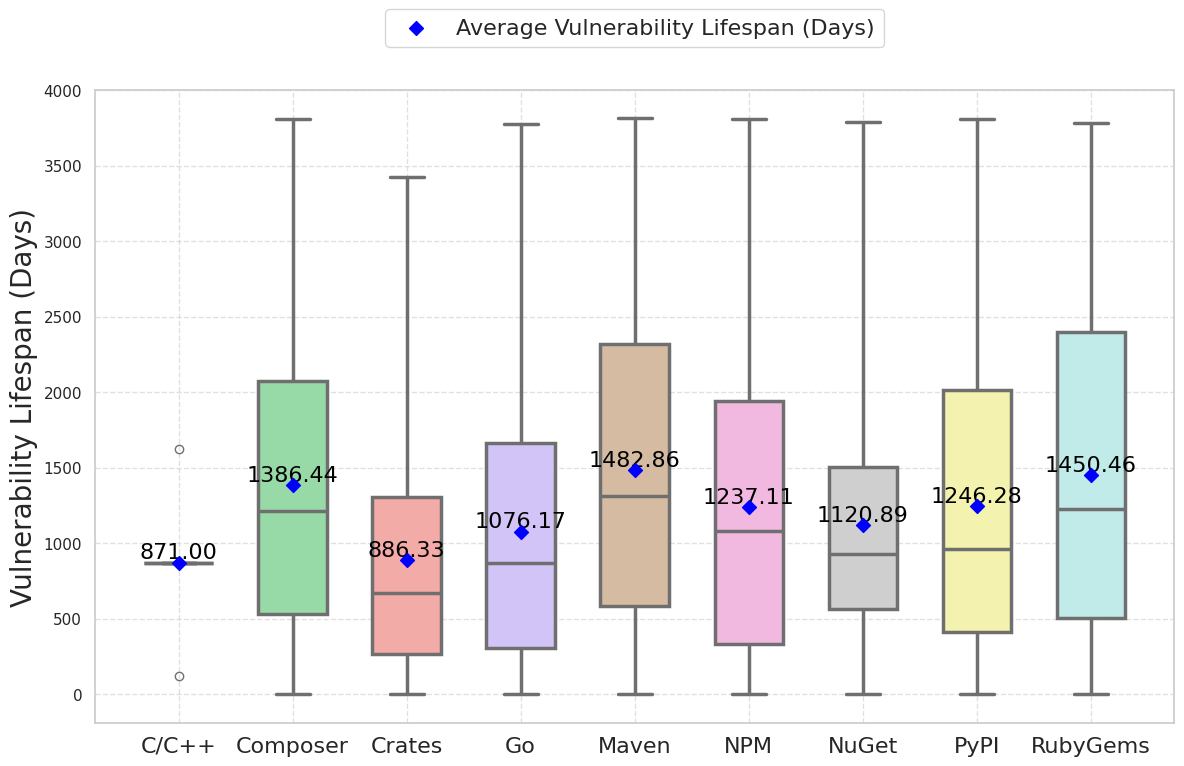

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Assuming df_filtered is already defined
df_2 = df_filtered

# Split the tuple column into separate columns
df_2[['days_from_vuln_to_fix', 'days_from_dis_to_fix', 'days_from_pub_to_fix']] = pd.DataFrame(
    df_2['Avg_time_to_fix'].tolist(), index=df_2.index
)

# Calculate the 95th percentile for each column
percentiles = df_2[['days_from_vuln_to_fix', 'days_from_dis_to_fix', 'days_from_pub_to_fix']].quantile(0.95)

# Filter out rows where the values exceed the 95th percentile
filtered_df_2 = df_2[
    (df_2['days_from_vuln_to_fix'] <= percentiles['days_from_vuln_to_fix']) &
    (df_2['days_from_dis_to_fix'] <= percentiles['days_from_dis_to_fix']) &
    (df_2['days_from_pub_to_fix'] <= percentiles['days_from_pub_to_fix'])
]

mean_vuln_liefspan = filtered_df_2.groupby('Platform')['days_from_vuln_to_fix'].mean().reset_index()


# Extract relevant columns for boxplot
metric = 'days_from_vuln_to_fix'

# Set up the figure and axes
fig = plt.figure(figsize=(12, 8))

sns.set(style="whitegrid")
cool_palette = sns.color_palette("pastel")


# Create a boxplot for each metric
# for idx, metric in enumerate(metrics):
filtered_df_2 = filtered_df_2.sort_values(by='Platform')
boxplot = sns.boxplot(x='Platform', y=metric, data=filtered_df_2, palette=cool_palette[1:], linewidth=2.5, width=0.6, showfliers=True, whis=np.inf)
plt.scatter(x=mean_vuln_liefspan['Platform'], y=mean_vuln_liefspan['days_from_vuln_to_fix'], 
        color='blue', marker='D', s=50, label='Average Vulnerability Lifespan (Days)', zorder=5)

for index, row in mean_vuln_liefspan.iterrows():
    plt.text(row['Platform'], row['days_from_vuln_to_fix'], 
            f"{row['days_from_vuln_to_fix']:.2f}", 
            color='black', ha='center', va='bottom', fontsize=16)

# plt.subplot(1, 3, idx + 1)  # Create subplots for each metric
# filtered_df_2.boxplot(column=metric, by='Platform', palette=cool_palette, linewidth=2.5, width=0.6, showfliers=True, whis=np.inf)

# Add labels and titles
# plt.title(f'{metric.replace("_", " ").title()} by Platform')
plt.suptitle("")  # Remove the automatic overarching title
plt.xlabel('', fontsize=16)
plt.ylabel('Vulnerability Lifespan (Days)', fontsize=20)
# plt.xlabel('Platform')
# plt.ylabel('Time (Days)')

plt.xticks(fontsize=16)  # Set x ticks font size

# Add a grid to the plot for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend for the mean points
plt.legend(bbox_to_anchor=(0.5, 1.05), loc='lower center',  fontsize=16)


# Adjust layout
plt.tight_layout()
plt.show()

# fig.savefig('boxplot_vuln_lifespan.pdf')
# fig.savefig('days_from_dis_to_fix.pdf')

Year  days_from_vuln_to_fix
0  2018            1024.849887
1  2019             980.966121
2  2020            1311.137593
3  2021            1466.030752
4  2022            1564.420054
5  2023            1766.010975
6  2024            1770.585601
7  2025            1666.671755

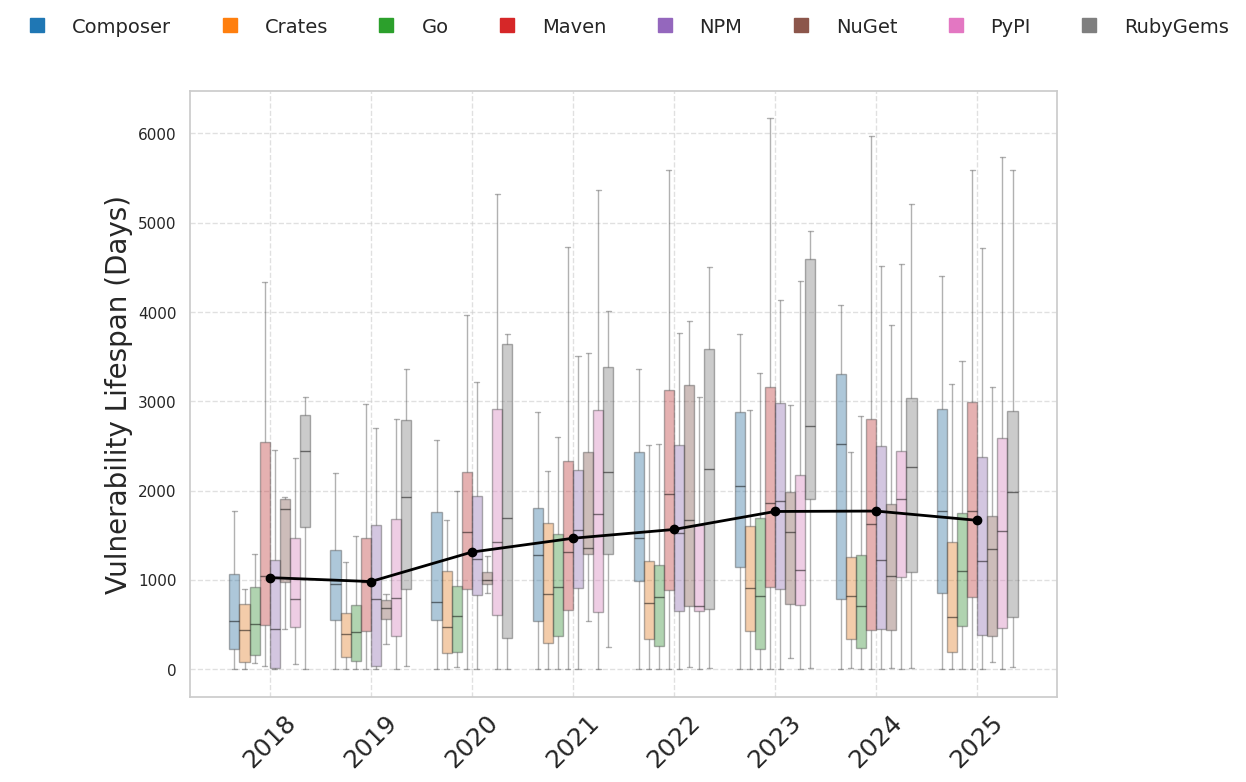

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D



def plot_combined_box_line_centered_on_box(df):
    df = df[df['Platform'] != 'C/C++']
    df['Year'] = df['Year'].apply(lambda x: int(x))
    sns.set_theme(style="whitegrid")  # Darker theme
    plt.figure(figsize=(12, 8))

    year_order = sorted(df['Year'].unique())
    platform_order = sorted(df['Platform'].unique())
    n_platforms = len(platform_order)

    # Plot boxplots per platform
    ax = sns.boxplot(
        data=df,
        x='Year',
        y='days_from_vuln_to_fix',
        hue='Platform',
        palette='tab10',
        showfliers=False,
        order=year_order,
        hue_order=platform_order,
        linewidth=1,
        boxprops=dict(alpha=0.4),
        whiskerprops=dict(alpha=0.4),
        capprops=dict(alpha=0.4),
        medianprops=dict(color='black', alpha=0.5)
    )

    # Get the center x positions for each year
    xticks = ax.get_xticks()

    # Compute overall mean (across platforms) for each year
    overall_mean = df.groupby('Year')['days_from_vuln_to_fix'].mean().reset_index()
    display(overall_mean)
    # Plot a single black trend line for global average
    ax.plot(
        xticks,
        overall_mean['days_from_vuln_to_fix'],
        color='black',
        marker='o',
        linestyle='-',
        linewidth=2,
        label='Global Mean'
    )

    # Simplified legend: platform colors from boxplot + global mean
    # handles, labels = ax.get_legend_handles_labels()
    # Define consistent color palette
    palette = sns.color_palette('tab10', n_colors=len(platform_order))
    color_map = dict(zip(platform_order, palette))

    # Manually define legend handles
    legend_elements = [
        Line2D([0], [0], color=color_map[platform], marker='s', linestyle='None', markersize=10, label=platform)
        for platform in platform_order
    ]

    # Calculate columns for 2-row legend
    ncol = math.ceil(len(platform_order))

    # Draw the legend
    plt.legend(
        handles=legend_elements,
        loc='upper center',
        bbox_to_anchor=(0.5, 1.15),  # Move legend above the plot
        ncol=ncol,
        frameon=False,
        fontsize=14
    )


    # Aesthetic formatting
    plt.ylabel('Vulnerability Lifespan (Days)', fontsize=20)
    plt.xlabel('')
    plt.xticks(ticks=xticks, labels=year_order, rotation=45, fontsize=18)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig("lifespan_trend_boxplot_and_global_avg.png", dpi=300)
    plt.show()

df = df_2
df = df.dropna(subset=['Vuln_version_info'])

df['Year'] = df['Vuln_version_info'].apply(lambda x: int(x[0][5][:4]) if x else None)
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int)


filtered_df = df[(df['Year'] >= 2017) & (df['Year'] <= 2025)]
plot_combined_box_line_centered_on_box(filtered_df)